In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# -----------------------------------------------------------------------------
#  Load and Clean the Data
# -----------------------------------------------------------------------------
# Full path to the file
file_path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\2. eda\9. Video Game Sales\vgsales.csv"

# Load the data
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\nFirst 5 rows of the data:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'vgsales.csv' file not found. Please make sure the file path is correct.")

Data loaded successfully!
The dataset contains 16598 rows and 11 columns.

First 5 rows of the data:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [4]:
# Column Types
print("Column Types:\n")
print(df.dtypes)
print("-" * 50)

Column Types:

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
--------------------------------------------------


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int32  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
 11  Decade        16327 non-null  int32  
dtypes: float64(5), int32(2), int64(1), object(4)
memory usage: 1.5+ MB
None


In [6]:
# Number of missing values
print("Number of missing values per column:\n")
print(df.isnull().sum())
print("-" * 50)

Number of missing values per column:

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
--------------------------------------------------


In [7]:
# Number of unique values
print("Number of unique values per column:\n")
print(df.nunique())
print("-" * 50)

Number of unique values per column:

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64
--------------------------------------------------


In [8]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


In [9]:
print(df.describe(include='all'))

                Rank                         Name Platform          Year  \
count   16598.000000                        16598    16598  16327.000000   
unique           NaN                        11493       31           NaN   
top              NaN  Need for Speed: Most Wanted       DS           NaN   
freq             NaN                           12     2163           NaN   
mean     8300.605254                          NaN      NaN   2006.406443   
std      4791.853933                          NaN      NaN      5.828981   
min         1.000000                          NaN      NaN   1980.000000   
25%      4151.250000                          NaN      NaN   2003.000000   
50%      8300.500000                          NaN      NaN   2007.000000   
75%     12449.750000                          NaN      NaN   2010.000000   
max     16600.000000                          NaN      NaN   2020.000000   

         Genre        Publisher      NA_Sales      EU_Sales      JP_Sales  \
count    1

In [10]:
# -----------------------------------------------------------------------------
# تنظيف البيانات
# -----------------------------------------------------------------------------
# 1. حذف الصفوف اللي مفيهاش سنة الإصدار
df = df.dropna(subset=['Year'])

# ملء القيم الفارغة في Publisher بكلمة "Unknown"
df['Publisher'] = df['Publisher'].fillna("Unknown")

#  تحويل Year إلى int
df['Year'] = df['Year'].astype(int)

# ضبط Global_Sales بحيث يساوي مجموع المبيعات الإقليمية
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

# مراجعة سريعة بعد التنظيف
print("بعد التنظيف:")
print(f"عدد الصفوف: {df.shape[0]}")
print(f"عدد القيم المفقودة:\n{df.isnull().sum()}")
print("\nأول 5 صفوف بعد التنظيف:")
print(df.head())


بعد التنظيف:
عدد الصفوف: 16327
عدد القيم المفقودة:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

أول 5 صفوف بعد التنظيف:
   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.83  
3     15.75 

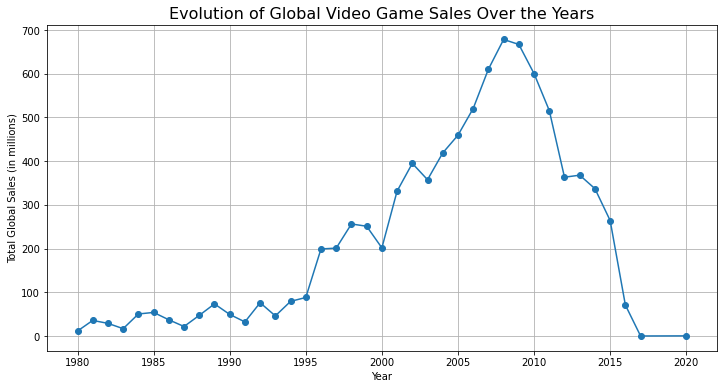

Top 5 years by global sales:
Year
2008    678.49
2009    667.10
2007    610.44
2010    600.36
2006    520.52
Name: Global_Sales, dtype: float64


In [11]:
import matplotlib.pyplot as plt
# Aggregate global sales for each year
sales_per_year = df.groupby("Year")["Global_Sales"].sum()

# Plot the time trend
plt.figure(figsize=(12,6))
plt.plot(sales_per_year.index, sales_per_year.values, marker='o')
plt.title("Evolution of Global Video Game Sales Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Global Sales (in millions)")
plt.grid(True)
plt.show()

# Show the top 5 years in terms of sales
print("Top 5 years by global sales:")
print(sales_per_year.sort_values(ascending=False).head())

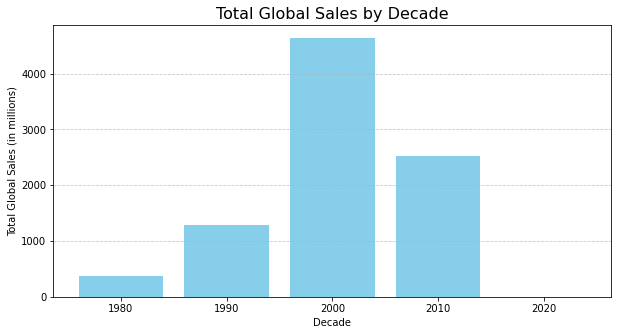

Top decade by global sales:
Decade
2000    4640.51
Name: Global_Sales, dtype: float64


In [12]:
# Create a new column for the decade
df['Decade'] = (df['Year'] // 10) * 10

# Aggregate global sales for each decade
sales_per_decade = df.groupby("Decade")["Global_Sales"].sum()

# Plot the trend by decade
plt.figure(figsize=(10,5))
plt.bar(sales_per_decade.index.astype(str), sales_per_decade.values, color="skyblue")
plt.title("Total Global Sales by Decade", fontsize=16)
plt.xlabel("Decade")
plt.ylabel("Total Global Sales (in millions)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Top decade in terms of sales
print("Top decade by global sales:")
print(sales_per_decade.sort_values(ascending=False).head(1))

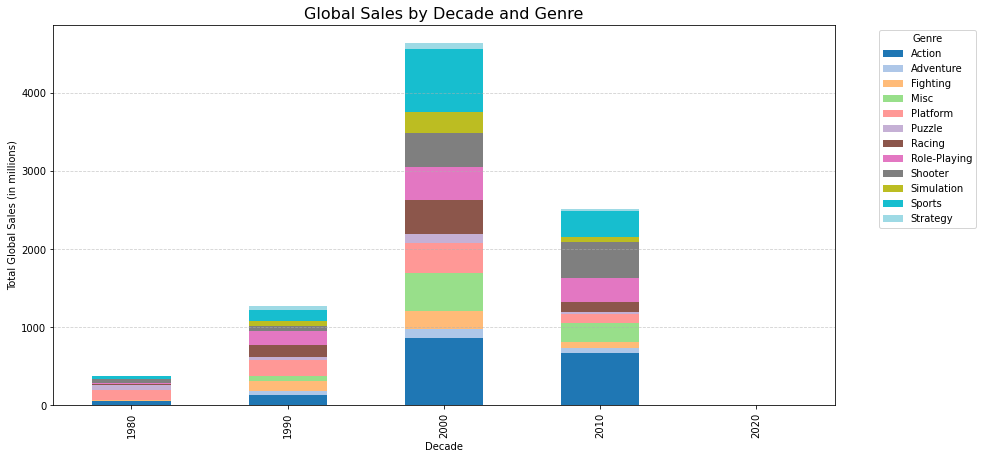

Best game genre in each decade:
Decade
1980      Platform
1990      Platform
2000        Action
2010        Action
2020    Simulation
dtype: object


In [13]:
# Create a new column for the decade if it's not already done
df['Decade'] = (df['Year'] // 10) * 10

# Aggregate sales by decade and genre
sales_decade_genre = df.groupby(['Decade', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

# Create a stacked plot showing each decade with genres
sales_decade_genre.plot(kind='bar', stacked=True, figsize=(14,7), colormap="tab20")
plt.title("Global Sales by Decade and Genre", fontsize=16)
plt.xlabel("Decade")
plt.ylabel("Total Global Sales (in millions)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Best genre in each decade
best_genre_per_decade = sales_decade_genre.idxmax(axis=1)
print("Best game genre in each decade:")
print(best_genre_per_decade)

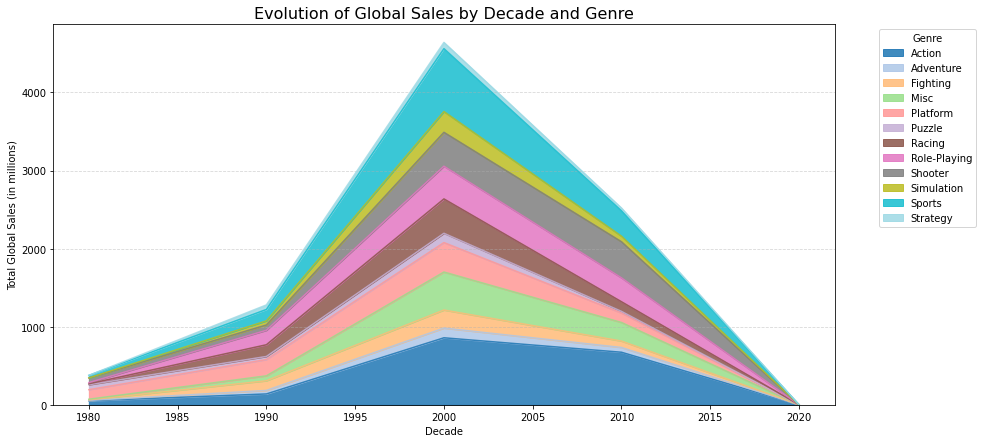

In [14]:
# Create decade column if not already done
df['Decade'] = (df['Year'] // 10) * 10

# Aggregate sales by decade and genre
sales_decade_genre = df.groupby(['Decade', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

# Plot stacked area chart
sales_decade_genre.plot(
    kind='area', 
    figsize=(14,7), 
    colormap="tab20", 
    alpha=0.85
)

plt.title("Evolution of Global Sales by Decade and Genre", fontsize=16)
plt.xlabel("Decade")
plt.ylabel("Total Global Sales (in millions)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13196\3194006479.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sales, x='Global_Sales', y='Genre', palette='viridis')


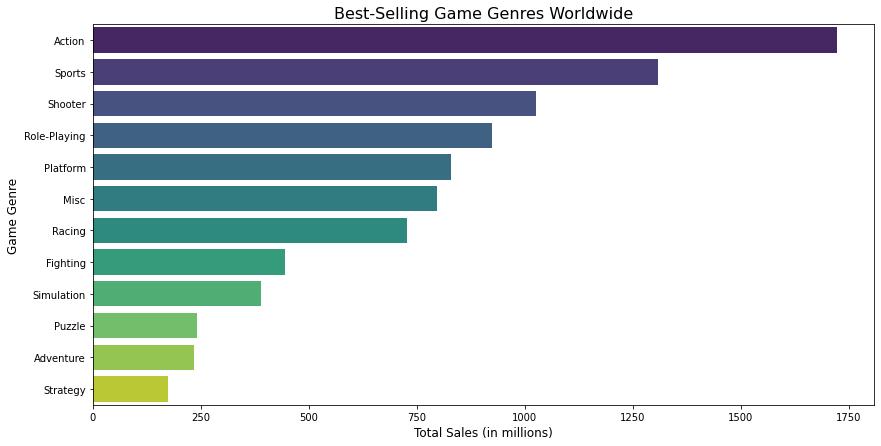

In [15]:
# -----------------------------------------------------------------------------
# Analysis of the Most Popular Game Genres
# -----------------------------------------------------------------------------

# Aggregate sales by game genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# Set up the plot
plt.figure(figsize=(14, 7))
sns.barplot(data=genre_sales, x='Global_Sales', y='Genre', palette='viridis')

# Customize the plot
plt.title('Best-Selling Game Genres Worldwide', fontsize=16)
plt.xlabel('Total Sales (in millions)', fontsize=12)
plt.ylabel('Game Genre', fontsize=12)
plt.show()

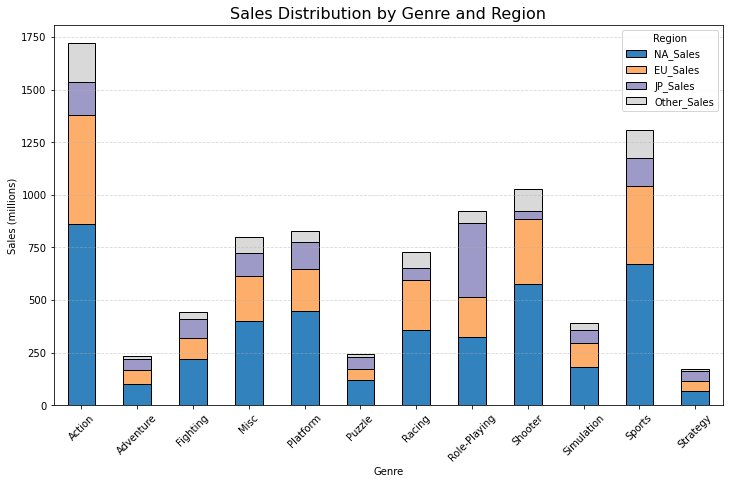

In [16]:
# -----------------------------------------------------------------------------
# Sales Distribution by Genre and Region
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Aggregate sales by genre and region
region_genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plot Stacked Bar Chart
region_genre_sales.plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    colormap="tab20c",
    edgecolor='black'
)

plt.title("Sales Distribution by Genre and Region", fontsize=16)
plt.xlabel("Genre")
plt.ylabel("Sales (millions)")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13196\3709303462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_sales, x='Global_Sales', y='Platform', palette='plasma')


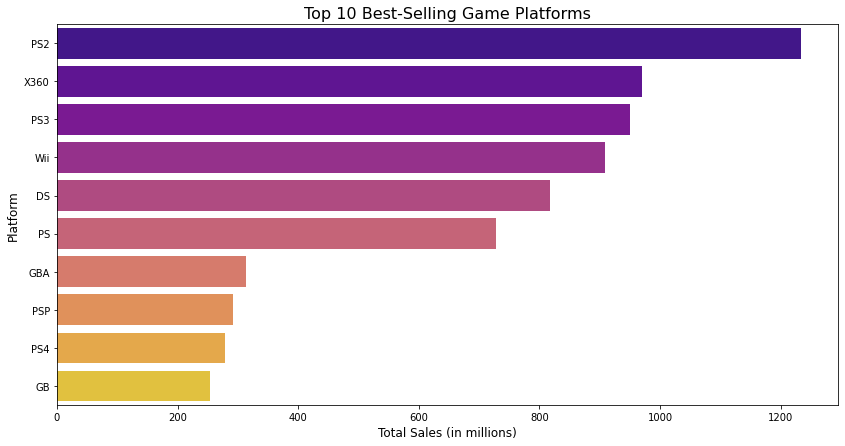

In [17]:
# -----------------------------------------------------------------------------
# Analysis of Best-Selling Game Platforms
# -----------------------------------------------------------------------------

# Aggregate sales by platform (for the top 10 platforms)
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

# Set up the plot
plt.figure(figsize=(14, 7))
sns.barplot(data=platform_sales, x='Global_Sales', y='Platform', palette='plasma')

# Customize the plot
plt.title('Top 10 Best-Selling Game Platforms', fontsize=16)
plt.xlabel('Total Sales (in millions)', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13196\4253629400.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_platforms.index, y=top10_platforms.values, palette="viridis")


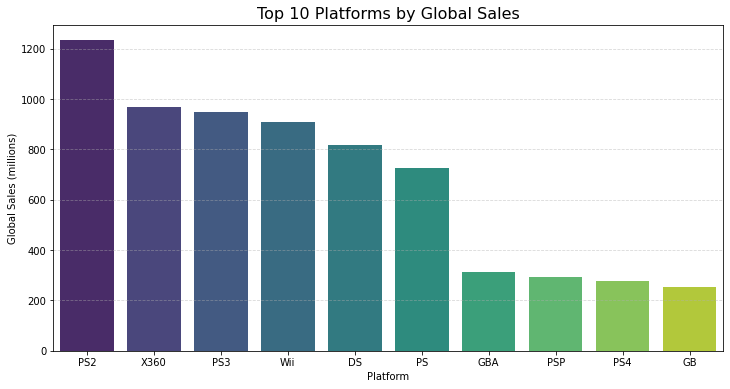

Top 10 Platforms by Global Sales:
Platform
PS2     1233.56
X360     969.31
PS3      949.39
Wii      909.20
DS       817.94
PS       727.56
GBA      312.88
PSP      291.66
PS4      278.16
GB       254.43
Name: Global_Sales, dtype: float64


In [18]:
# -----------------------------------------------------------------------------
# Sales Analysis by Platform
# -----------------------------------------------------------------------------

# Aggregate sales by platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Select the top 10 platforms
top10_platforms = platform_sales.head(10)

# Plot the data
plt.figure(figsize=(12,6))
sns.barplot(x=top10_platforms.index, y=top10_platforms.values, palette="viridis")

plt.title("Top 10 Platforms by Global Sales", fontsize=16)
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Print the values
print("Top 10 Platforms by Global Sales:")
print(top10_platforms)

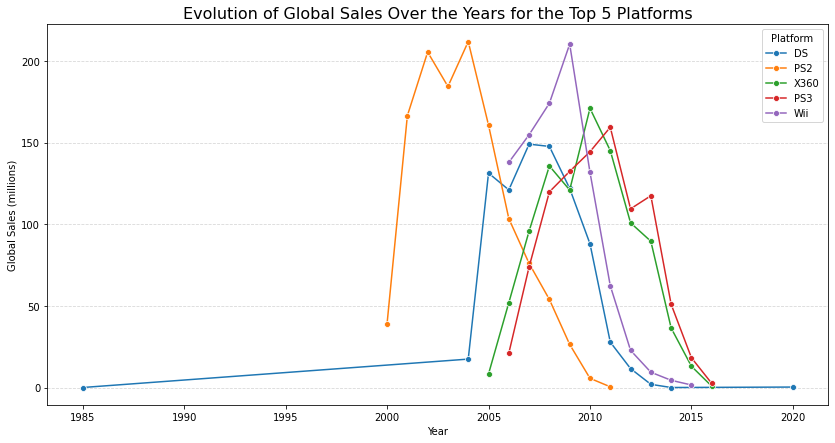

In [19]:
# -----------------------------------------------------------------------------
# Analysis of Platform Evolution Over the Years
# -----------------------------------------------------------------------------

# Aggregate global sales for each platform by year
platform_year_sales = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Select only the top 5 platforms to make the plot clearer
top5_platforms = platform_sales.head(5).index
platform_year_sales_top5 = platform_year_sales[platform_year_sales['Platform'].isin(top5_platforms)]

# Plot the timelines
plt.figure(figsize=(14,7))
sns.lineplot(
    data=platform_year_sales_top5,
    x="Year",
    y="Global_Sales",
    hue="Platform",
    marker="o"
)

plt.title("Evolution of Global Sales Over the Years for the Top 5 Platforms", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.legend(title="Platform")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

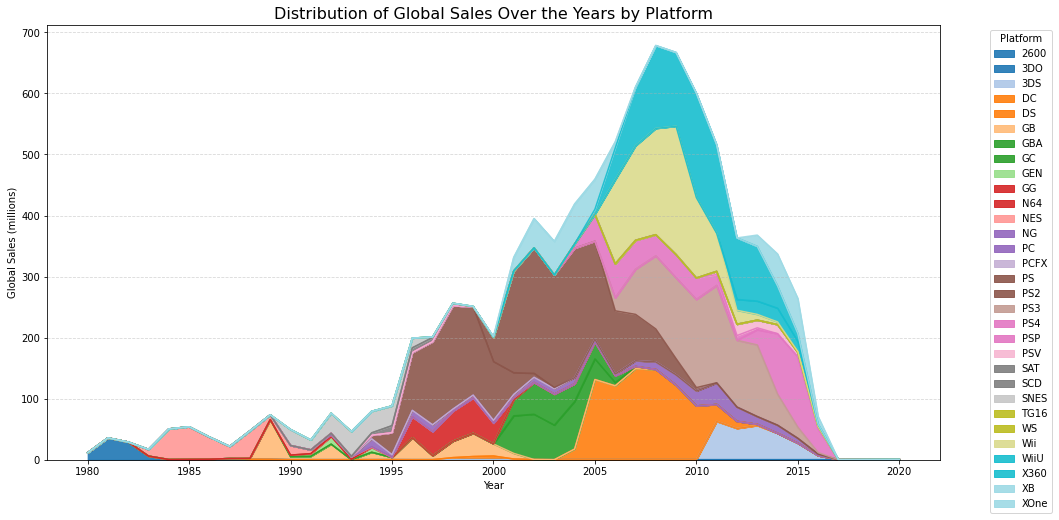

In [20]:
# -----------------------------------------------------------------------------
# Stacked area chart for all platforms
# -----------------------------------------------------------------------------

# Aggregate sales by year and platform
platform_year_sales_all = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack().fillna(0)

# Plot stacked area chart
platform_year_sales_all.plot(
    kind='area',
    figsize=(16,8),
    colormap="tab20",
    alpha=0.9
)

plt.title("Distribution of Global Sales Over the Years by Platform", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

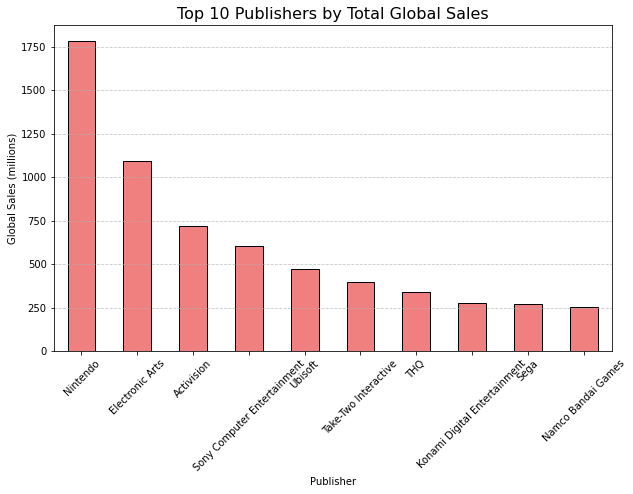

In [21]:
# -----------------------------------------------------------------------------
# Sales Analysis by Publisher
# -----------------------------------------------------------------------------

# Aggregate global sales for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Plot Bar Chart for the top 10 publishers
plt.figure(figsize=(10,6))
publisher_sales.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title("Top 10 Publishers by Total Global Sales", fontsize=16)
plt.xlabel("Publisher")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13196\1380240594.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=publisher_sales, x='Global_Sales', y='Publisher', palette='magma')


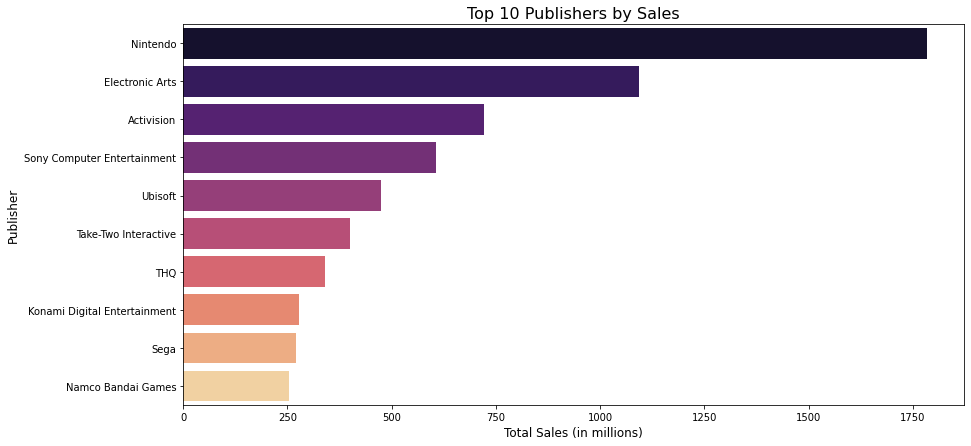

In [22]:
# -----------------------------------------------------------------------------
# Analysis of the Most Successful Publishers
# -----------------------------------------------------------------------------

# Aggregate sales by publisher (for the top 10 publishers)
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

# Set up the plot
plt.figure(figsize=(14, 7))
sns.barplot(data=publisher_sales, x='Global_Sales', y='Publisher', palette='magma')

# Customize the plot
plt.title('Top 10 Publishers by Sales', fontsize=16)
plt.xlabel('Total Sales (in millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()

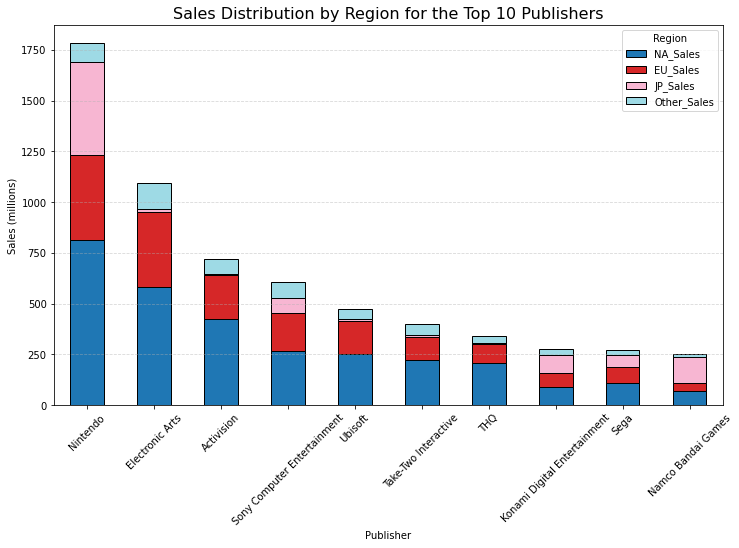

In [23]:
# -----------------------------------------------------------------------------
# Comparing Publishers by Region
# -----------------------------------------------------------------------------

# Aggregate regional sales for each publisher
publisher_region_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Select the top 10 publishers globally
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).index

# Filter the table for the top 10 publishers
top_publisher_region_sales = publisher_region_sales.loc[top_publishers]

# Plot Stacked Bar Chart
top_publisher_region_sales.plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    colormap="tab20",
    edgecolor='black'
)

plt.title("Sales Distribution by Region for the Top 10 Publishers", fontsize=16)
plt.xlabel("Publisher")
plt.ylabel("Sales (millions)")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

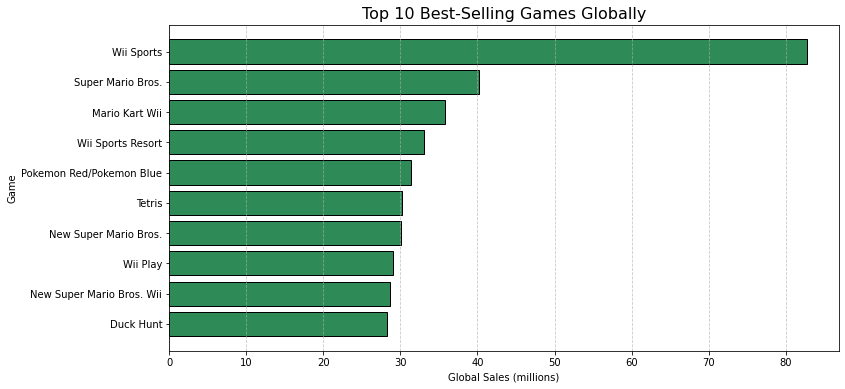

In [24]:
# -----------------------------------------------------------------------------
# Analysis of Top Games
# -----------------------------------------------------------------------------

# Select the top 10 games by global sales
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

# Plot Bar Chart
plt.figure(figsize=(12,6))
plt.barh(top_games['Name'], top_games['Global_Sales'], color='seagreen', edgecolor='black')

plt.title("Top 10 Best-Selling Games Globally", fontsize=16)
plt.xlabel("Global Sales (millions)")
plt.ylabel("Game")
plt.gca().invert_yaxis()  # To have the top game at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

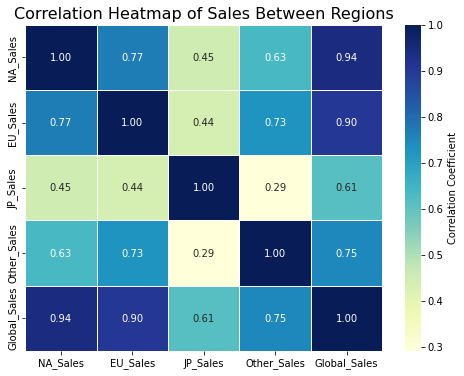

In [25]:
# -----------------------------------------------------------------------------
# Heatmap for correlations between quantitative variables (NA, EU, JP, Other, Global)
# -----------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Select the region-specific columns
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Calculate the correlation matrix
corr_matrix = region_sales.corr()

# Plot the Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="YlGnBu", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap of Sales Between Regions", fontsize=16)
plt.show()

In [26]:
# -----------------------------------------------------------------------------
# Simple Dashboard using Plotly
# -----------------------------------------------------------------------------
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# 1. Sales evolution over the years
yearly_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()

# 2. Sales distribution by genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# 3. Top 10 games
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

# 4. Top 10 publishers
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

# Create Dashboard using Subplots
fig = sp.make_subplots(
    rows=2, cols=2,
    subplot_titles=("Sales Evolution Over the Years",
                      "Sales Distribution by Genre",
                      "Top 10 Games",
                      "Top 10 Publishers")
)

# Plot 1: Sales evolution over the years
fig.add_trace(go.Scatter(x=yearly_sales['Year'], y=yearly_sales['Global_Sales'],
                         mode='lines+markers', name="Global Sales"),
              row=1, col=1)

# Plot 2: Sales by genre
fig.add_trace(go.Bar(x=genre_sales['Genre'], y=genre_sales['Global_Sales'],
                       marker_color='teal', name="Genres"),
              row=1, col=2)

# Plot 3: Top 10 games
fig.add_trace(go.Bar(x=top_games['Global_Sales'], y=top_games['Name'],
                       orientation='h', marker_color='seagreen', name="Top Games"),
              row=2, col=1)

# Plot 4: Top 10 publishers
fig.add_trace(go.Bar(x=top_publishers['Publisher'], y=top_publishers['Global_Sales'],
                       marker_color='indianred', name="Top Publishers"),
              row=2, col=2)

# Final layout formatting
fig.update_layout(height=900, width=1100, title_text="📊 Simple Dashboard for Video Game Sales")
fig.show()

In [27]:
# -----------------------------------------------------------------------------
# Interactive Dashboard with a Dropdown to select the region
# -----------------------------------------------------------------------------
import plotly.graph_objects as go

# Prepare the data
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

# Draw the base plot (e.g., by year)
fig = go.Figure()

# Add each region as a Trace
for region in regions:
    yearly_data = df.groupby('Year')[region].sum().reset_index()
    fig.add_trace(go.Scatter(
        x=yearly_data['Year'],
        y=yearly_data[region],
        mode='lines+markers',
        name=region,
        visible=(region == 'Global_Sales')  # Make 'Global_Sales' visible by default
    ))

# Add the Dropdown Menu
buttons = []
for i, region in enumerate(regions):
    buttons.append(dict(
        method='update',
        label=region,
        args=[{'visible': [j == i for j in range(len(regions))]},
              {'title': f"Sales Over Years in {region}"}]
    ))

fig.update_layout(
    updatemenus=[dict(
        active=3,  # Make 'Global_Sales' the default
        buttons=buttons,
        x=1.2,
        y=1.1
    )],
    title="Video Game Sales Over Years",
    xaxis_title="Year",
    yaxis_title="Sales (Millions)"
)

fig.show()

In [28]:
# -----------------------------------------------------------------------------
# Full Dashboard + Dropdown to select the region
# -----------------------------------------------------------------------------
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Available columns for selection
regions = {
    "Global": "Global_Sales",
    "NA": "NA_Sales",
    "EU": "EU_Sales",
    "JP": "JP_Sales"
}

# Base data (Global region as a starting point)
region = "Global_Sales"
genre_sales = df.groupby("Genre")[region].sum().sort_values(ascending=False)
publisher_sales = df.groupby("Publisher")[region].sum().sort_values(ascending=False).head(10)
year_sales = df.groupby("Year")[region].sum()

# -----------------------------------------------------------------------------
# Create Dashboard
# -----------------------------------------------------------------------------
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Sales by Genre", "Top 10 Publishers", "Sales Over Years"),
    specs=[[{"type":"domain"}, {"type":"bar"}],
           [{"colspan":2, "type":"scatter"}, None]]
)

# Pie Chart
pie = go.Pie(labels=genre_sales.index, values=genre_sales.values, name="Genre Sales")
fig.add_trace(pie, row=1, col=1)

# Bar Chart
bar = go.Bar(x=publisher_sales.index, y=publisher_sales.values, name="Top Publishers", marker_color="indigo")
fig.add_trace(bar, row=1, col=2)

# Line Chart
line = go.Scatter(x=year_sales.index, y=year_sales.values, mode="lines+markers", name="Sales", line=dict(color="green"))
fig.add_trace(line, row=2, col=1)

# -----------------------------------------------------------------------------
# Dropdown Menu
# -----------------------------------------------------------------------------
updatemenus = [
    dict(
        buttons=[
            dict(
                label=region_name,
                method="update",
                args=[{"values": [
                            df.groupby("Genre")[col].sum().sort_values(ascending=False).values,  # Pie
                            df.groupby("Publisher")[col].sum().sort_values(ascending=False).head(10).values,  # Bar
                            df.groupby("Year")[col].sum().values  # Line
                        ],
                        "y": [
                            None,
                            df.groupby("Publisher")[col].sum().sort_values(ascending=False).head(10).values,
                            None
                        ],
                        "x": [
                            None,
                            df.groupby("Publisher")[col].sum().sort_values(ascending=False).head(10).index,
                            df.groupby("Year")[col].sum().index
                        ]
                },
                {"title": f"Video Game Sales Dashboard - {region_name}"}]
            )
            for region_name, col in regions.items()
        ],
        direction="down",
        showactive=True
    )
]

fig.update_layout(
    title="Video Game Sales Dashboard - Global",
    height=800,
    showlegend=True,
    updatemenus=updatemenus
)

fig.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary startin

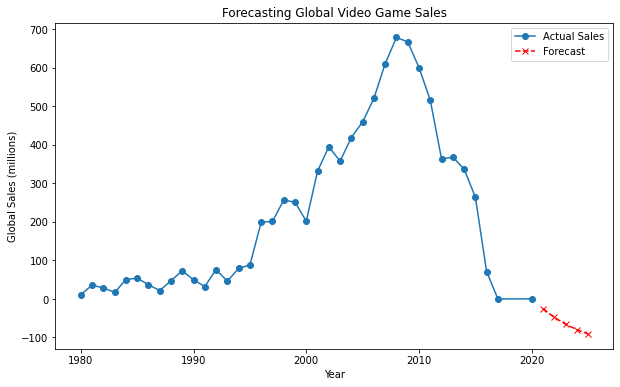

In [29]:
# -----------------------------------------------------------------------------
# Forecasting Global Game Sales using ARIMA
# -----------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. Aggregate global sales by year
sales_by_year = df.groupby("Year")["Global_Sales"].sum()

# 2. Build the ARIMA model
model = ARIMA(sales_by_year, order=(2,1,2))  # (p,d,q)
model_fit = model.fit()

# 3. Forecast the next 5 years
forecast = model_fit.forecast(steps=5)

# 4. Plot the results
plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index, sales_by_year.values, label="Actual Sales", marker='o')
plt.plot(range(sales_by_year.index[-1]+1, sales_by_year.index[-1]+1+5),
         forecast, label="Forecast", marker='x', linestyle='--', color="red")
plt.title("Forecasting Global Video Game Sales")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.legend()
plt.show()

00:24:34 - cmdstanpy - INFO - Chain [1] start processing
00:24:36 - cmdstanpy - INFO - Chain [1] done processing


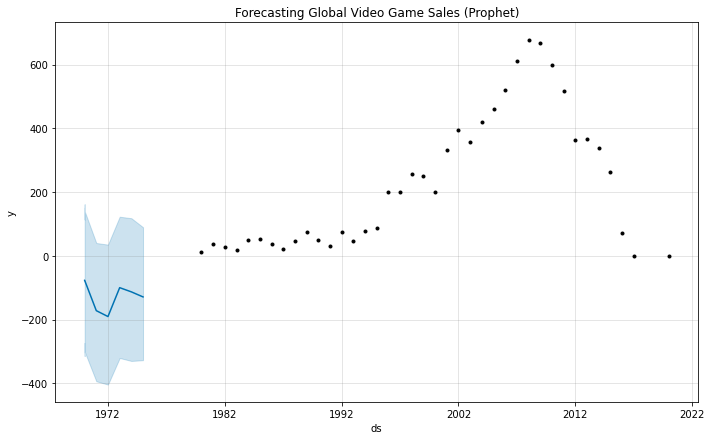

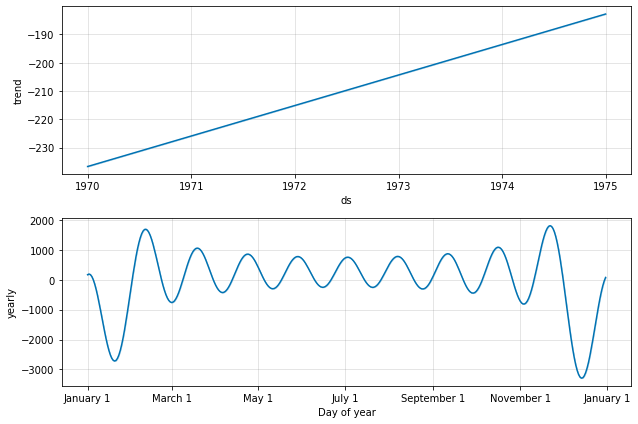

In [30]:
# -----------------------------------------------------------------------------
# Forecasting Global Game Sales using Prophet
# -----------------------------------------------------------------------------
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data in Prophet's format (ds = date, y = value)
sales_by_year = df.groupby("Year")["Global_Sales"].sum().reset_index()
sales_by_year.rename(columns={"Year": "ds", "Global_Sales": "y"}, inplace=True)

# Build the Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(sales_by_year)

# Forecast the next 5 years
future = model.make_future_dataframe(periods=5, freq="Y")
forecast = model.predict(future)

# Plot the results
fig1 = model.plot(forecast)
plt.title("Forecasting Global Video Game Sales (Prophet)")
plt.show()

# Plot the components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary startin

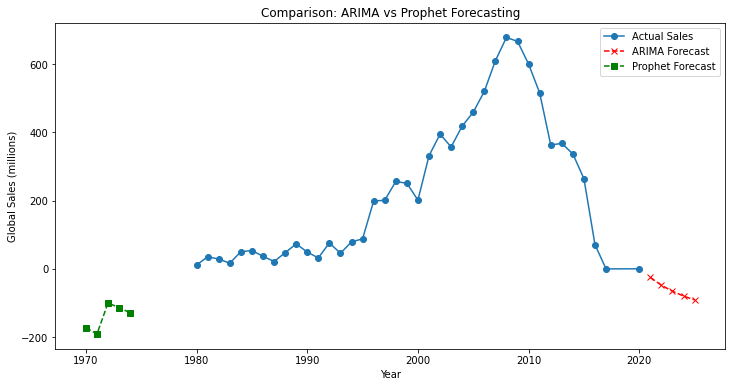

In [31]:
# -----------------------------------------------------------------------------
# Comparing ARIMA and Prophet in Forecasting Global Game Sales
# -----------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# 1. ARIMA data
sales_by_year = df.groupby("Year")["Global_Sales"].sum()
arima_model = ARIMA(sales_by_year, order=(2,1,2))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=5)

# Prepare ARIMA data for plotting
arima_years = list(range(sales_by_year.index[-1]+1, sales_by_year.index[-1]+1+5))

# 2. Prophet data
prophet_df = sales_by_year.reset_index()
prophet_df.rename(columns={"Year": "ds", "Global_Sales": "y"}, inplace=True)

prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=5, freq="Y")
forecast = prophet_model.predict(future)

# Prepare Prophet data for plotting
prophet_forecast = forecast.tail(5)[["ds", "yhat"]]

# 3. Plot comparison of ARIMA vs Prophet
plt.figure(figsize=(12,6))
plt.plot(sales_by_year.index, sales_by_year.values, label="Actual Sales", marker='o')
plt.plot(arima_years, arima_forecast, label="ARIMA Forecast", marker='x', linestyle='--', color="red")
plt.plot(prophet_forecast["ds"].dt.year, prophet_forecast["yhat"], label="Prophet Forecast", marker='s', linestyle='--', color="green")

plt.title("Comparison: ARIMA vs Prophet Forecasting")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.legend()
plt.show()

In [32]:
# -----------------------------------------------------------------------------
# Calculate RMSE to compare ARIMA and Prophet
# -----------------------------------------------------------------------------
import numpy as np
from sklearn.metrics import mean_squared_error

# 1. Split the data (take the last 5 years for testing)
train = sales_by_year[:-5]
test = sales_by_year[-5:]

# -------------------------------
# ARIMA
# -------------------------------
arima_model = ARIMA(train, order=(2,1,2))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=5)

rmse_arima = np.sqrt(mean_squared_error(test, arima_pred))

# -------------------------------
# Prophet
# -------------------------------
prophet_df = train.reset_index()
prophet_df.rename(columns={"Year": "ds", "Global_Sales": "y"}, inplace=True)

prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=5, freq="Y")
forecast = prophet_model.predict(future)

prophet_pred = forecast.tail(5)["yhat"].values
rmse_prophet = np.sqrt(mean_squared_error(test, prophet_pred))

# -------------------------------
# Display the results
# -------------------------------
print("📊 RMSE Results:")
print(f"ARIMA RMSE   = {rmse_arima:.3f}")
print(f"Prophet RMSE = {rmse_prophet:.3f}")

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimiza

📊 RMSE Results:
ARIMA RMSE   = 302.687
Prophet RMSE = 407.997
